In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade scikit-learn
!pip install plot_confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
#Importing all the libraries to be used

import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
import pandas as pd
import os

# Defining the path to the dataset
path = "/content/drive/MyDrive/transaction_data.csv"

# Checking if the file exists before reading it
if os.path.exists(path):
    # Reading the dataset into a pandas DataFrame
    df = pd.read_csv(path, encoding='latin-1')

    # Displaying the first few rows of the DataFrame to understand its structure
    print(df.head())
else:
    print("File not found at the specified path.")


  Unnamed: 0 phoneNumber                                    id  \
0          0  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
1          1  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
2          2  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
3          3  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
4          4  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   

                       updateAt senderAddress  \
0  Sat, 7 May 2022 19:48:00 UTC     JK-SmplPL   
1  Sat, 7 May 2022 19:48:00 UTC     VP-ViCARE   
2  Sat, 7 May 2022 19:48:00 UTC     VP-612345   
3  Sat, 7 May 2022 19:48:00 UTC     BP-ACKOGI   
4  Sat, 7 May 2022 19:48:00 UTC     VP-ViCARE   

                                                text          Label  
0  Rs.95.15 on Zomato charged via Simpl.\n--\nFoo...           Spam  
1  Hi! Update your email id through WhatsApp: htt...  Phone Service  
2  Lucknow ya Kolkata ? - watch it LIVE with Vi c...           Spam  
3  Mohd,\nCheck the incredib

In [5]:
df.shape

(100389, 7)

In [6]:
print(df.Label.unique())

['Spam' 'Phone Service' 'Financial' 'Personal' nan]


In [7]:
df.describe()

,Unnamed: 0,phoneNumber,id,updateAt,senderAddress,text,Label
count,100246,100387,100317,100243,100243,100160,100099
unique,100246,99,94,138,8927,59316,4
top,0,xx31026369,72b90e8a-1960-44f6-9bfc-a19a9410bd47,"Wed, 11 May 2022 09:50:29 UTC",TX-SFXRDR,We are unable to get your location. Location i...,Spam
freq,1,7880,7880,2001,3401,1151,83158


In [8]:
# creating a dataframe  with just two columns
df1 = df[['text', 'Label']].copy()

# removing the missing values from text
df1 = df1[pd.notnull(df1['text'])]
df1 = df1[pd.notnull(df1['Label'])]


print(df1.shape)
print(df1.Label.unique())
df1.head().T

(100090, 2)
['Spam' 'Phone Service' 'Financial' 'Personal']


,0,1,2,3,4
text,Rs.95.15 on Zomato charged via Simpl.\n--\nFoo...,Hi! Update your email id through WhatsApp: htt...,Lucknow ya Kolkata ? - watch it LIVE with Vi c...,"Mohd,\nCheck the incredible Acko insurance pol...",Hi! You can now get your Vi prepaid invoice em...
Label,Spam,Phone Service,Spam,Spam,Phone Service


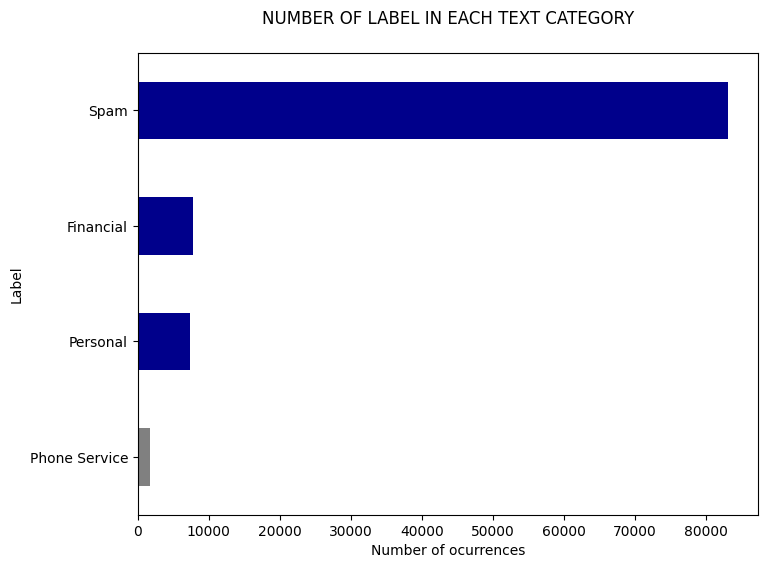

In [9]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','darkblue','darkblue','darkblue']
df1.groupby('Label').text.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF LABEL IN EACH TEXT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [10]:
df1 = df1[df1['Label'] != 'Spam']
df1.describe()

,text,Label
count,16932,16932
unique,11747,3
top,I'll call you right back.,Financial
freq,98,7834


In [11]:
pd.DataFrame(df1.Label.unique())

,0
0,Phone Service
1,Financial
2,Personal


In [12]:
# creating a new column 'label id' with encoded categories
df1['label_id'] = df1['Label'].factorize()[0]
label_id_df = df1[['Label','label_id']].drop_duplicates()

# dictionaries for future use
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id','Label']].values)

# new dataframe
df1.head()

<ipython-input-12-d64d4b74fa34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label_id'] = df1['Label'].factorize()[0]


,text,Label,label_id
1,Hi! Update your email id through WhatsApp: htt...,Phone Service,0
4,Hi! You can now get your Vi prepaid invoice em...,Phone Service,0
8,Received Rs.600.00 in your a/c 91XX3635 from O...,Financial,1
9,Count#1: Rs 600 paid by 98XXXX4000 at 12:20 AM...,Financial,1
26,"Dear Customer, registration for Google Pay has...",Financial,1


In [13]:
print(label_to_id)
print(id_to_label)

label_id_df.head()

{'Phone Service': 0, 'Financial': 1, 'Personal': 2}
{0: 'Phone Service', 1: 'Financial', 2: 'Personal'}


,Label,label_id
1,Phone Service,0
8,Financial,1
56,Personal,2


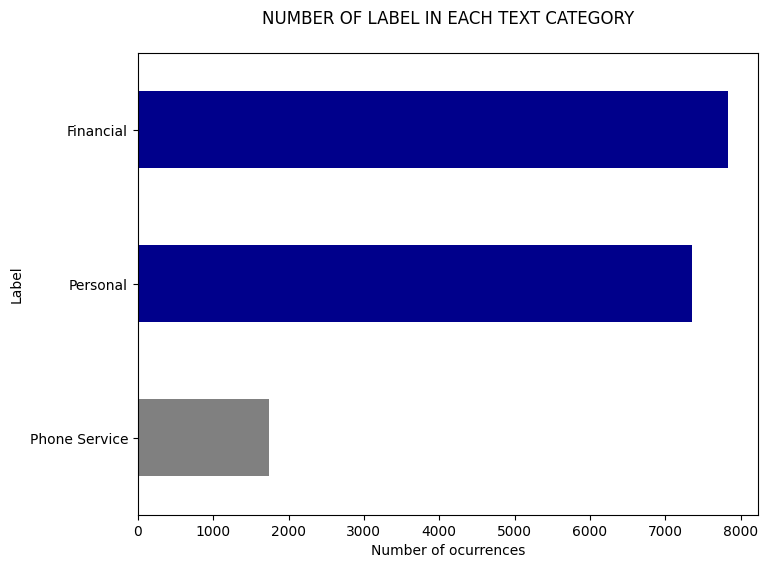

In [14]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','darkblue','darkblue','darkblue']
df1.groupby('Label').text.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF LABEL IN EACH TEXT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [15]:
# creating a tfidf vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df1.text).toarray()

labels = df1.label_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))


Each of the 16932 complaints is represented by 9513 features (TF-IDF score of unigrams and bigrams)


In [ ]:
# not

# Finding the three most correlated terms with each of the text categories
N = 3
for Product, label_id in sorted(label_to_id.items()):
  features_chi2 = chi2(features, labels == label_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))



==> 
:
  * Most Correlated Unigrams are: na, ll, nhi
  * Most Correlated Bigrams are: ¾à 2000, ll right, 2000 ªà

==> 

Hello Snehal Nagdeve , I am associated to Reliance. I hereby share information to assist you in making financial decisions. Click on link Visiting Card : https://saservices.reliancenipponlife.com/digitalvisitingcard/visitingcard.aspx?Sapcode=HEIEJKNM

Hello Snehal Nagdeve , I am associated to Reliance. I hereby share information to assist you in making financial decisions. Click on link Why Insurance and Why RNLIC (Video) : https://bit.ly/3r9NYrF

Hello Snehal Nagdeve , I am associated with Reliance Nippon Life Insurance Company. I am pleased to share information that will assist you in making your financial decisions. Click on link 1: Retirement Calculator: https://saservices.reliancenipponlife.com/RetirementCalc/RetirementCalC.aspx?CustomerName=Snehal__SellerName=SHALINI__SellerMobile=9823852537__LeadID=19306658__Sap=70605412 T&C Apply. Reliance Nippon Life Insuran

In [16]:
X = df1['text'] # Collection of documents
y = df1['Label'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)

In [17]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: Futu

In [18]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.982754,0.006990
LogisticRegression,0.972123,0.012812
MultinomialNB,0.919618,0.011566
RandomForestClassifier,0.801792,0.034377


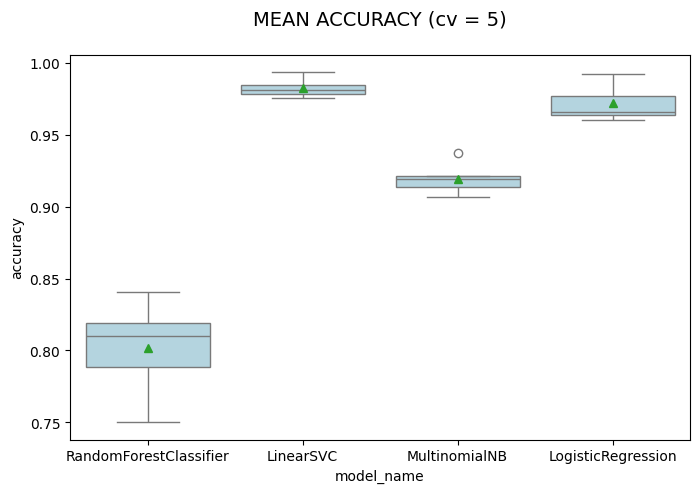

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [20]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,
                                                               labels,
                                                               df1.index, test_size=0.25,
                                                               random_state=42)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [22]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred,
                                    target_names= df1['Label'].unique()))


				CLASSIFICATIION METRICS

               precision    recall  f1-score   support

Phone Service       1.00      1.00      1.00       408
    Financial       1.00      1.00      1.00      2001
     Personal       1.00      1.00      1.00      1824

     accuracy                           1.00      4233
    macro avg       1.00      1.00      1.00      4233
 weighted avg       1.00      1.00      1.00      4233



In [23]:
label_id_df.head()

,Label,label_id
1,Phone Service,0
8,Financial,1
56,Personal,2


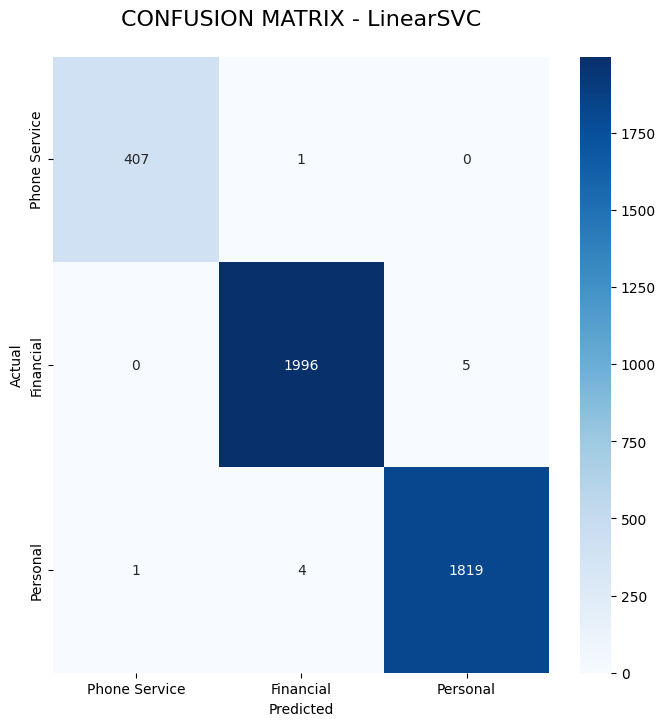

In [24]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=label_id_df.Label.values,
            yticklabels=label_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [26]:
message = """Your VPA sanju39chd@okaxis linked to Punjab National Bank a/c no. XXXXXX4158 is debited for Rs.140.00 and credited to paytmqr123545050101xo2pulse786j@paytm (UPI Ref no 212237512625).-Punjab National Bank"""
print(model.predict(fitted_vectorizer.transform([message])))

['Financial']


In [27]:
import pickle
pickle.dump(model,open('svc_transactionClassification', 'wb'))

# Extracting Data from financial

In [28]:
loaded_model = pickle.load(open('svc_transactionClassification', 'rb'))

In [29]:
import re

In [30]:
message = """Dear Customer, Your A/C ###234 is debited by NPR 3000 For: 9860901204/QR Pay, KFC/ET. Never Share Password/OTP With Anyone"""
if loaded_model.predict(fitted_vectorizer.transform([message])) == 'Financial':
  print("accept")

accept


In [31]:
# Sample messages
sample_messages = [
    "Dear Customer, Your A/C ###234 is debited by NPR 3000 For: 9860901204/QR Pay, KFC/ET. Never Share Password/OTP With Anyone",
    "Hi, you have received NPR 5000 from John Doe for lunch.",
    "Your credit card ending in ###1234 has been charged NPR 2000 for online shopping at XYZ Store.",
    "Your monthly phone bill of NPR 1000 is due. Please make payment to avoid service interruption.",
    "Congratulations! You've won a free vacation. Click here to claim your prize.",
]


In [32]:
for i in range(len(sample_messages)):
  print("Message: ",sample_messages[i])
  print("Message Type: ",loaded_model.predict(fitted_vectorizer.transform([sample_messages[i]])))

Message:  Dear Customer, Your A/C ###234 is debited by NPR 3000 For: 9860901204/QR Pay, KFC/ET. Never Share Password/OTP With Anyone
Message Type:  ['Financial']
Message:  Hi, you have received NPR 5000 from John Doe for lunch.
Message Type:  ['Personal']
Message:  Your credit card ending in ###1234 has been charged NPR 2000 for online shopping at XYZ Store.
Message Type:  ['Personal']
Message:  Your monthly phone bill of NPR 1000 is due. Please make payment to avoid service interruption.
Message Type:  ['Personal']
Message:  Congratulations! You've won a free vacation. Click here to claim your prize.
Message Type:  ['Personal']


In [33]:
# Regular expressions
regex_debited_credited = re.compile(r'(debited|credited)')
regex_amount = re.compile(r'(?:(?:NPR|USD|EUR)\s?\d+(?:,\d{3})*(?:\.\d+)?)')
regex_remarks = re.compile(r'For: (.+?)(?:\.|$)')

for i in range(len(sample_messages)):
  if loaded_model.predict(fitted_vectorizer.transform([sample_messages[i]])) == 'Financial':
    print("Transactional Message")
    match_debited_credited = regex_debited_credited.search(sample_messages[i])
    match_amount = regex_amount.search(sample_messages[i])
    match_remarks = regex_remarks.search(sample_messages[i])

    debited_credited = match_debited_credited.group(0) if match_debited_credited else None
    amount = match_amount.group(0) if match_amount else None
    remarks = match_remarks.group(1) if match_remarks else None

    print("Message:", sample_messages[i])
    print("Debited/Credited:", debited_credited)
    print("Amount:", amount)
    print("Remarks:", remarks)

Transactional Message
Message: Dear Customer, Your A/C ###234 is debited by NPR 3000 For: 9860901204/QR Pay, KFC/ET. Never Share Password/OTP With Anyone
Debited/Credited: debited
Amount: NPR 3000
Remarks: 9860901204/QR Pay, KFC/ET
